# ( Prosper Loan  )
## by (Amira Fathy )

## Prosper’s Story:


Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than $13 billion in loans to more than 850,000 people.

Through Prosper, people can invest in each other in a way that is financially and socially rewarding. Borrowers apply online for a fixed-rate, fixed-term loan between $2,000 and \ $40,000. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors.

Prosper Marketplace is backed by leading investors including Sequoia Capital, Francisco Partners, Institutional Venture Partners, and Credit Suisse NEXT Fund.
https://www.prosper.com/about

In [26]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display

%matplotlib inline

# Data Gathering 


In [27]:
#read the dataset 
df=pd.read_csv('prosperLoanData.csv', parse_dates=['ListingCreationDate'])
pd.options.display.max_columns = None
display(df)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.1400,9425.00,1971.1400,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.6300,3001.00,1185.6300,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.2000,4091.09,1052.1100,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Emp

# Data assessing & cleaning 

In [28]:
# info data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   object        
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

In [29]:
# after reading data i found more of columns i don't need it  so i choose the columns i will work with it 
df_copy=df.copy()
df_copy=df_copy[['MemberKey','ListingCreationDate','LoanOriginalAmount','Term','LoanStatus','CreditGrade',
                 'ProsperRating (Alpha)','IsBorrowerHomeowner','ListingCategory (numeric)','Occupation',
                 'EmploymentStatus','EmploymentStatusDuration','BorrowerAPR','BorrowerState','BorrowerRate',
                 'StatedMonthlyIncome','MonthlyLoanPayment','CurrentlyInGroup','TotalTrades','Investors']]
df_copy.head()

,MemberKey,ListingCreationDate,LoanOriginalAmount,Term,LoanStatus,CreditGrade,ProsperRating (Alpha),IsBorrowerHomeowner,ListingCategory (numeric),Occupation,EmploymentStatus,EmploymentStatusDuration,BorrowerAPR,BorrowerState,BorrowerRate,StatedMonthlyIncome,MonthlyLoanPayment,CurrentlyInGroup,TotalTrades,Investors
0,1F3E3376408759268057EDA,2007-08-26 19:09:29.263,9425,36,Completed,C,NaN,True,0,Other,Self-employed,2.0,0.16516,CO,0.1580,3083.333333,330.43,True,11.0,258
1,1D13370546739025387B2F4,2014-02-27 08:28:07.900,10000,36,Current,NaN,A,False,2,Professional,Employed,44.0,0.12016,CO,0.0920,6125.000000,318.93,False,29.0,1
2,5F7033715035555618FA612,2007-01-05 15:00:47.090,3001,36,Completed,HR,NaN,False,0,Other,Not available,NaN,0.28269,GA,0.2750,2083.333333,123.32,True,NaN,41
3,9ADE356069835475068C6D2,2012-10-22 11:02:35.010,10000,36,Current,NaN,A,True,16,Skilled Labor,Employed,113.0,0.12528,GA,0.0974,2875.000000,321.45,False,26.0,158
4,36CE356043264555721F06C,2013-09-14 18:38:39.097,15000,36,Current,NaN,D,True,2,Executive,Employed,44.0,0.24614,MN,0.2085,9583.333333,563.97,False,39.0,20


In [30]:
# Splitting ListingCreationDate column into year,month
df_copy['year']= df_copy.ListingCreationDate.dt.year
df_copy['month'] = df_copy['ListingCreationDate'].dt.month

In [31]:
#divition the data to  two data df1 before july_2009 & df2  started  july_2009
df1 = df_copy.loc[df_copy.ListingCreationDate <= "June - 2009"]
df2 = df_copy.loc[df_copy.ListingCreationDate >'2009-06-30']

In [32]:
# creat function 
def ticks(n):
    
    plt.xticks(rotation=n,fontsize=15)
    plt.yticks(rotation=0,fontsize=15)
    return 

### What is the structure of your dataset?

>The dataset contains 113,937 loans with 81 features .

and this is the variable Definitions:

https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0
### What is/are the main feature(s) of interest in your dataset?

> i'm interset about :

> LoanOriginalAmount 

> Occupation

>  ProsperRating (Alpha)	


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Term 

> TotalTrades 

> year  

> Investors

> EmploymentStatus
 
> BorrowerState

## Univariate Exploration



### 1-Term 

Text(0.5, 1.0, 'The percentage for every Term ')

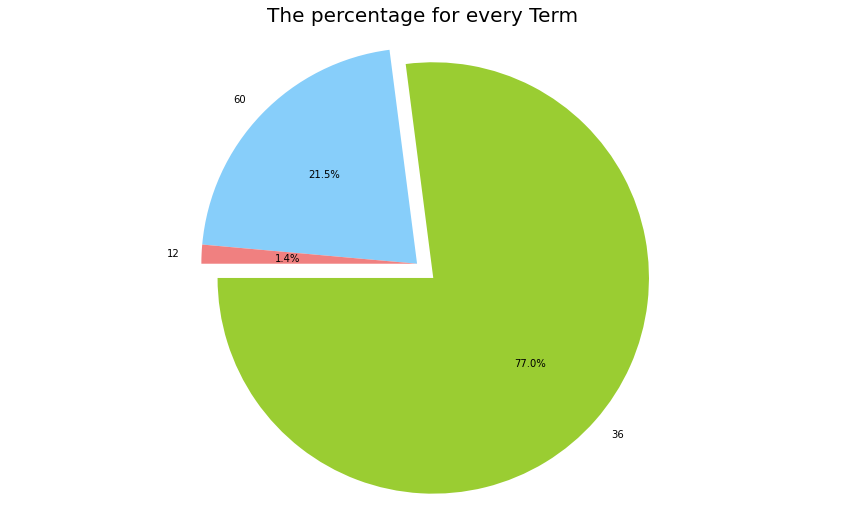

In [33]:
# use pie to see the percentage for every Term 
colors = ['yellowgreen', 'lightskyblue', 'lightcoral']
explode = (0.1, 0, 0)
plt.figure(figsize=(15, 9))
plt.pie(df_copy.Term.value_counts(),labels=df_copy.Term.value_counts().index,
        colors=colors,autopct='%1.1f%%',startangle=180,explode=explode)


plt.axis('equal')

plt.title('The percentage for every Term ',fontsize=20)


conclusion: 

I found the common  Term is 36 month, and the less one is  12 month 


Resource :https://pythonspot.com/matplotlib-pie-chart/

### 2- year 

Text(0.5, 1.0, ' The distribution of the count of loan from 2005 to 2014')

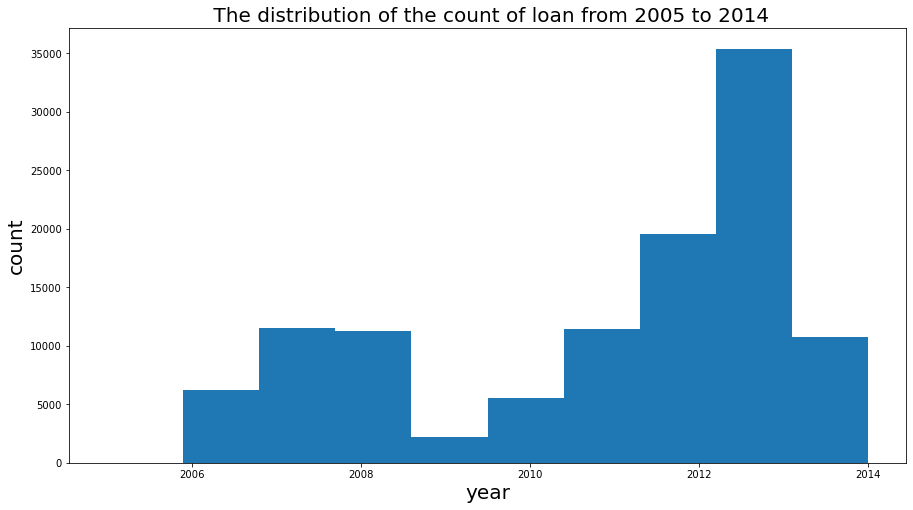

In [34]:
# histogram for years it shows the distribution of the count of loan from 2005 to 2014
plt.figure(figsize=(15,8))
plt.hist(data=df_copy,x='year')
plt.xlabel('year',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title(' The distribution of the count of loan from 2005 to 2014',fontsize=20)


conclusion:

I found the common year is 2013 and the less one  is 2009 

### 3- BorrowerState

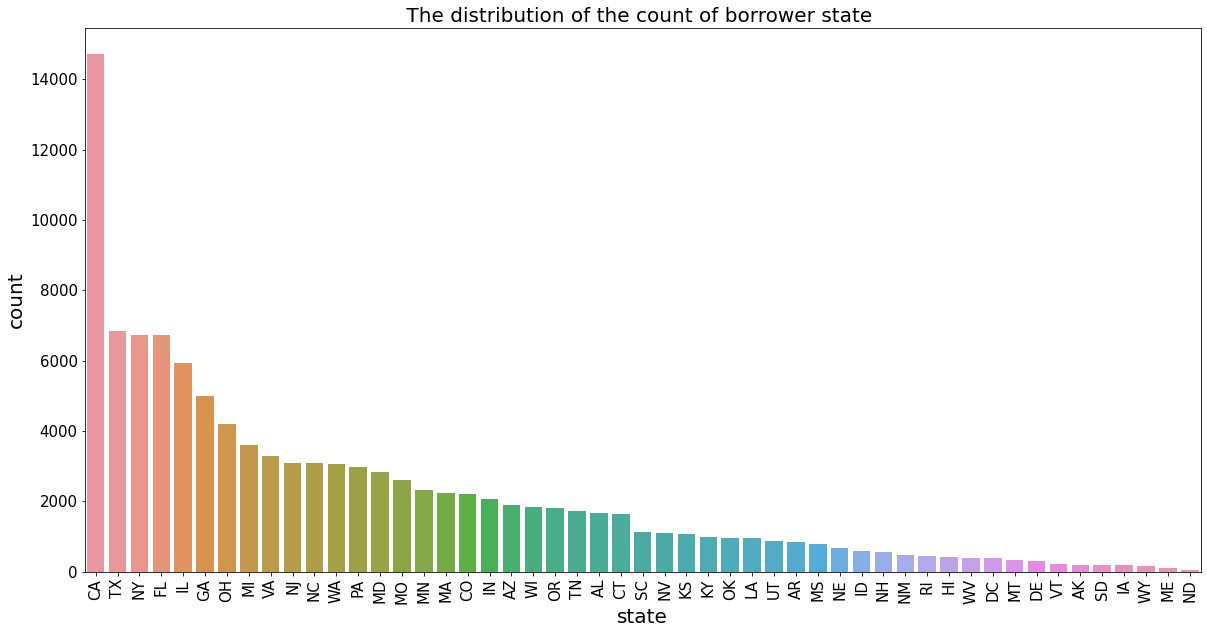

In [35]:
# bar chart  to know which borrowers state most common 
plt.figure(figsize=(20,10))
order= df_copy.BorrowerState.value_counts().index
sb.countplot(data=df_copy,x='BorrowerState',order=order)
plt.xlabel('state',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title(' The distribution of the count of borrower state  ',fontsize=20)
#plt.xticks(rotation=90,fontsize=20)
#plt.yticks(rotation=0,fontsize=15)
ticks(90)

conclusion : 

the common state  CA (California) & the less ome is MD(Maryland)

### 4- Occupation

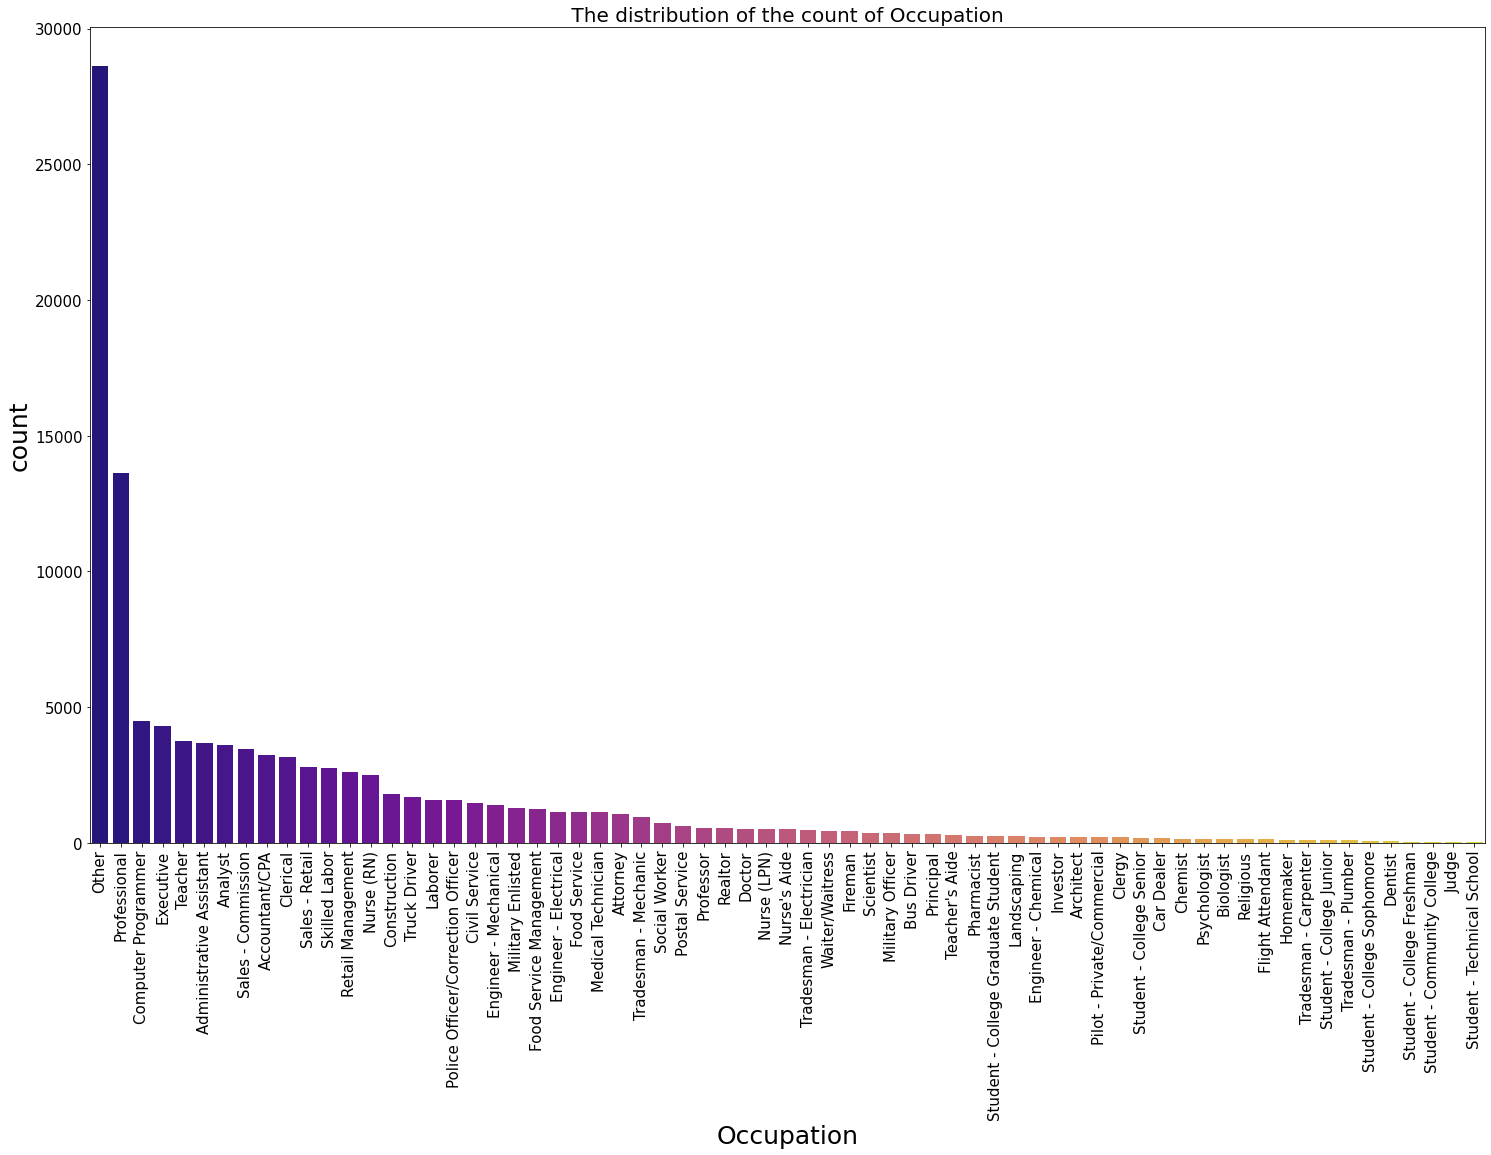

In [36]:
#bar chart to see the occupation of the borrower
plt.figure(figsize=(25,15))
order= df_copy.Occupation.value_counts().index
sb.countplot(data=df_copy,x='Occupation',palette='plasma',order=order)
plt.xlabel('Occupation',fontsize=25)
plt.ylabel('count',fontsize=25)
plt.title(' The distribution of the count of Occupation ',fontsize=20)
#plt.xticks(rotation=90,fontsize=20)
#plt.yticks(rotation=0,fontsize=15)
ticks(90)

conclusion : 

the common occupation is other  and the second is professional

### 5-EmploymentStatus

Text(0.5, 1.0, 'The percentage for every Term ')

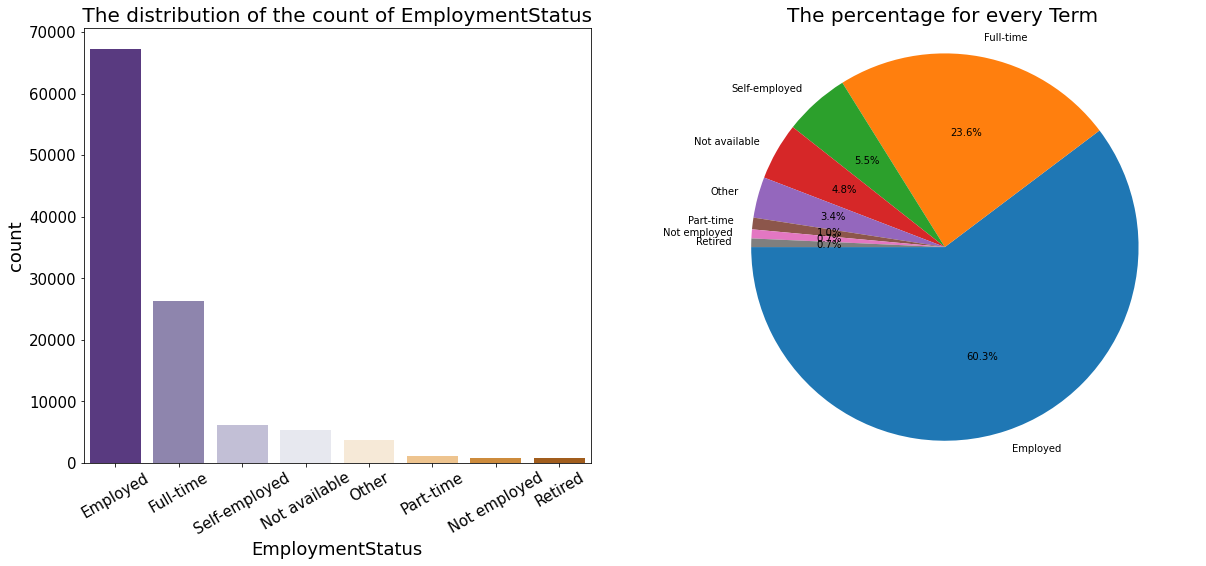

In [37]:
#bar chart to see the occupation of the borrower
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
order= df_copy.EmploymentStatus.value_counts().index
sb.countplot(data=df_copy,x='EmploymentStatus',palette='PuOr_r',order=order)
plt.xlabel('EmploymentStatus',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.title(' The distribution of the count of EmploymentStatus ',fontsize=20)
#plt.xticks(rotation=30,fontsize=15)
#plt.yticks(rotation=0,fontsize=15)
ticks(30)

plt.subplot(1,2,2)
plt.pie(df_copy.EmploymentStatus.value_counts(),labels=df_copy.EmploymentStatus.value_counts().index,
        autopct='%1.1f%%',startangle=180)


plt.axis('equal')

plt.title('The percentage for every Term ',fontsize=20)

conclusion :

the common Employment status  is employed   it is more than half  (60%)

### 6- IsBorrowerHomeowner

Text(0.5, 1.0, 'the percentage  of  borrowers  if have a home  or not  ')

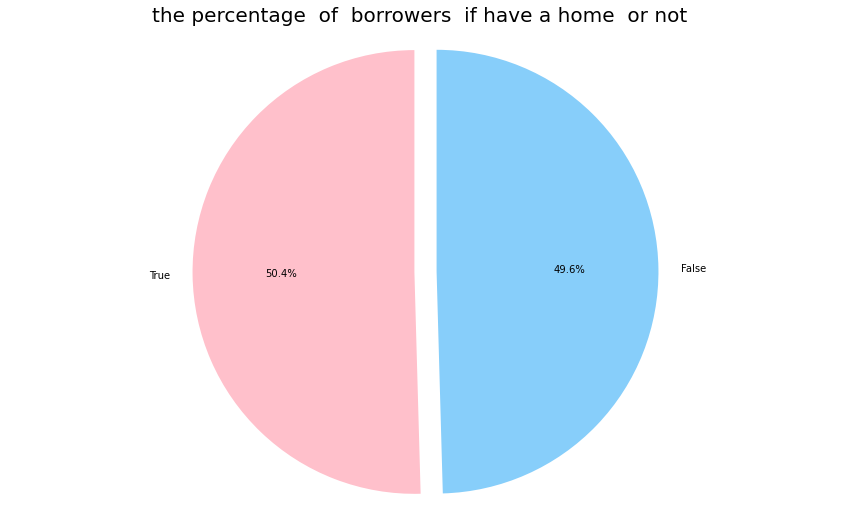

In [38]:
# pit to show the precentage  of  borrwer have a home 
colors = ['pink', 'lightskyblue']
explode = (0.1, 0)
plt.figure(figsize=(15, 9))
plt.pie(df_copy.IsBorrowerHomeowner.value_counts(),labels=df_copy.IsBorrowerHomeowner.value_counts().index,
        colors=colors,autopct='%1.1f%%',startangle=90,explode=explode)


plt.axis('equal')

plt.title('the percentage  of  borrowers  if have a home  or not  ',fontsize=20)


conclusion :

there is no difference in percentage for the borrowers who have a home or the borrowers not have a home just (.4%)it is less than .5%

### 7- risk ratio
  

#### -Credit Grade
#### - ProsperRating (Alpha)

<ipython-input-39-32548222d69b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CreditGrade']=df1.CreditGrade.astype(ordered_var)
<ipython-input-39-32548222d69b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ProsperRating (Alpha)']=df2['ProsperRating (Alpha)'].astype(ordered_var2)


Text(0.5, 1.0, ' ProsperRating (Alpha) the rating after july 2009')

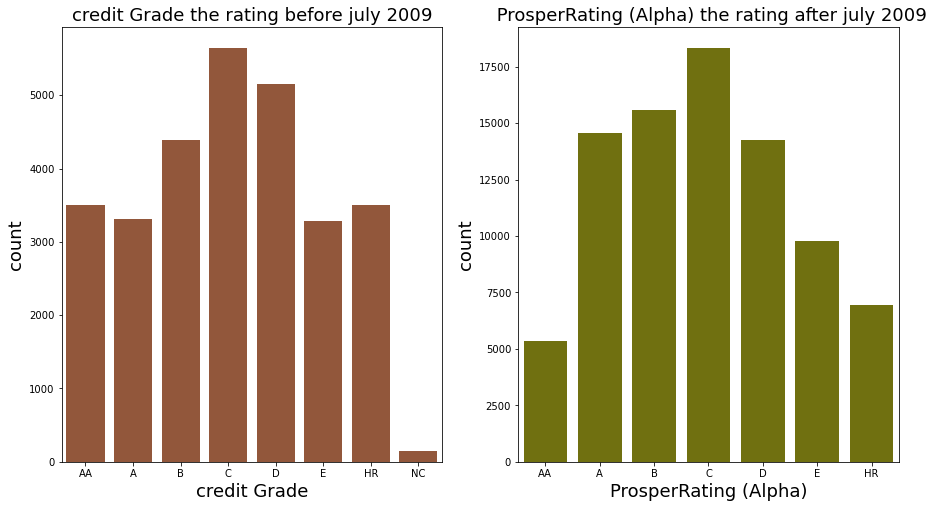

In [39]:
# Credit Grade the risk raito before 7-2009

rate_order = ['AA','A','B','C','D','E','HR','NC']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,categories = rate_order)
df1['CreditGrade']=df1.CreditGrade.astype(ordered_var)

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sb.countplot(data=df1,x='CreditGrade' ,color='sienna')
plt.xlabel('credit Grade',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.title('credit Grade the rating before july 2009',fontsize=18)

#  ProsperRating (Alpha) the risk raito after 7-2009

plt.subplot(1,2,2)
rate_order2 = ['AA','A','B','C','D','E','HR']
ordered_var2 = pd.api.types.CategoricalDtype(ordered = True,categories = rate_order2)
df2['ProsperRating (Alpha)']=df2['ProsperRating (Alpha)'].astype(ordered_var2)

sb.countplot(data=df2,x='ProsperRating (Alpha)',color='olive')
plt.xlabel('ProsperRating (Alpha)',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.title(' ProsperRating (Alpha) the rating after july 2009',fontsize=18)

conclusion :

c  is the most common risk ratio  from 2005 to 2014

### 8- listing categories 

In [40]:
#   in the data  there are 20 reason for loan  from 0 to 20 
reasons = {0:"Not Available", 1: "Debt Consolidation", 2: "Home Improvemen", 3: "Business", 4: "Personal Loan",
5:"Student Use", 6: "Auto", 7: "Other",  8:"Baby&Adoption", 9:"Boat", 10:"Cosmetic Procedure", 11:"Engagement Ring",
12: "Green Loans", 13:"Household Expenses", 14:"Large Purchases", 
15:"Medical/Dental", 16:"Motorcycle", 17:"RV", 18:"Taxes", 19:"Vacation", 20:"Wedding Loans"}

df_copy['ListingCategory']=df_copy['ListingCategory (numeric)'].map(reasons)

Text(0.5, 1.0, "Distribution of the loan's reasons  ")

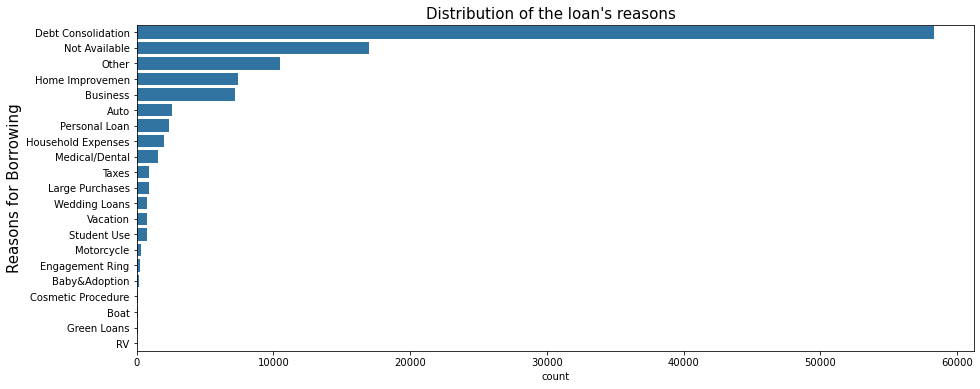

In [41]:
# Plotting the univariate graph of the reasons of haveing a loan
plt.figure(figsize=(15,6))
sb.countplot(data=df_copy, y='ListingCategory', color=sb.color_palette()[0],
             order= df_copy.ListingCategory.value_counts().index)
plt.ylabel('Reasons for Borrowing',fontsize=15)
plt.title('Distribution of the loan\'s reasons  ',fontsize=15)

conclusion :
 
Debt consolidation is the common reason to do a loan .

### 9- LoanStatus 

In [42]:
df_copy.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [43]:
#order list 
order_status=["Cancelled", "Completed","Current", "FinalPaymentInProgress", "Past Due (1-15 days)", 
              "Past Due (16-30 days)", "Past Due (31-60 days)", "Past Due (61-90 days)",
              "Past Due (91-120 days)", "Past Due (>120 days)","Defaulted", "Chargedoff"]


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 <a list of 7 Text major ticklabel objects>)

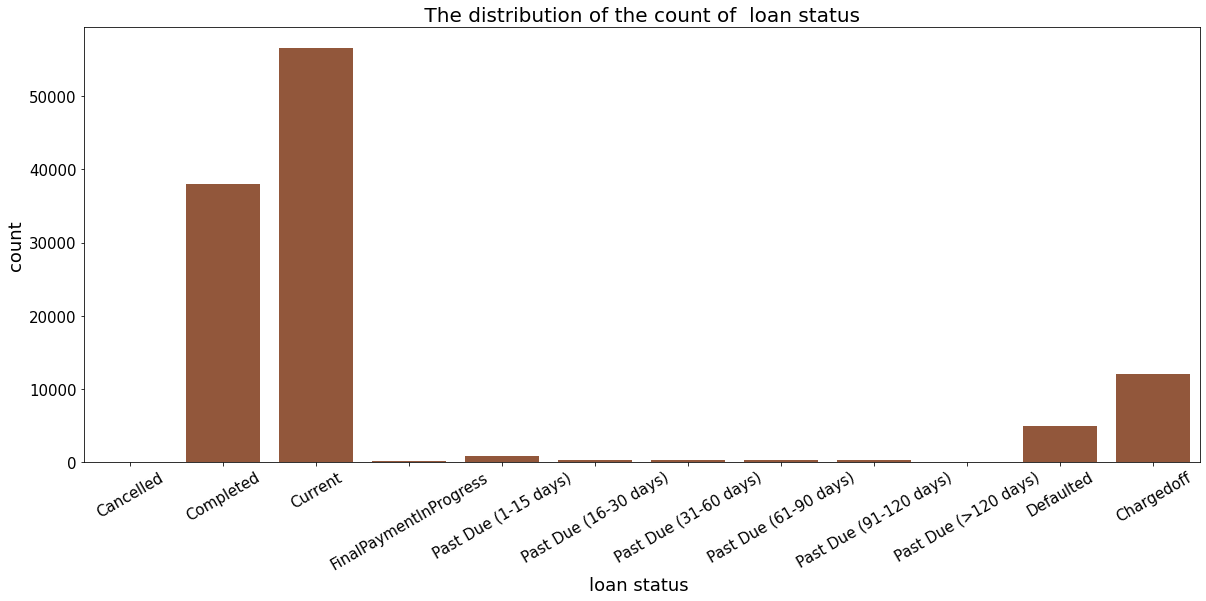

In [44]:
#distribution of the count of loan status 
plt.figure(figsize=(20,8))
sb.countplot(data=df_copy,x='LoanStatus', color='sienna',order=order_status )
plt.xlabel('loan status ',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.title(' The distribution of the count of  loan status ',fontsize=20)
plt.xticks(rotation=30,fontsize=15)
plt.yticks(rotation=0,fontsize=15)

 conclusion :

the current  & completed are bigger than the ratio of another  like past due   so it is good it is mean the  Prosper  don't take a risk and nothing is bad 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1- Term the common is 36 months 

2- loan vs year (the number of loans in 2013 was the most & in 2009 was the least) .

3- other  is the common occupation and the second is professional .

4 - the ratio of employed is  60 % of total  (this was intersting thing why the employed need the loan )

5- the common risk is c it is very good 

6- debt consolidation is the most reasons for the loan 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

1- created  the new column (year ) to use it to compary between variable by use year and see the effect every year like count of loans .

2- i need to order the (ProsperRating (Alpha) & credit Grade .

3- created  new column(ListingCategory) to know the reasons instead of the numbers  


## Bivariate Exploration



### 1- LoanOriginalAmount & monthly loan  

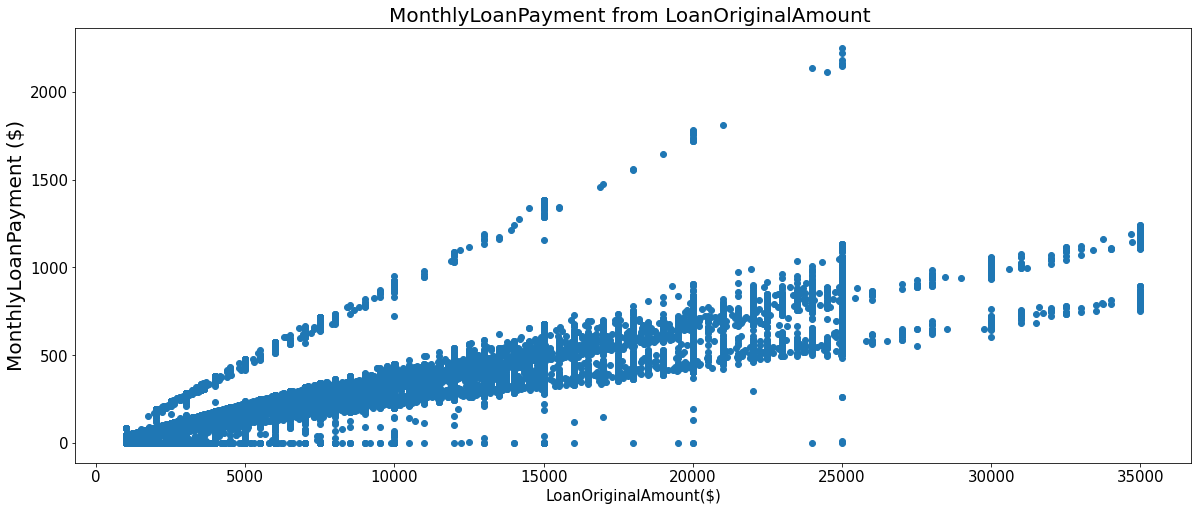

In [45]:
#scatter plot between  loan amount $ monthly loan 
plt.figure(figsize = [20, 8]) 

plt.scatter(data=df_copy ,x='LoanOriginalAmount',y='MonthlyLoanPayment')
plt.title('MonthlyLoanPayment from LoanOriginalAmount ',fontsize=20)
plt.xlabel('LoanOriginalAmount($)',fontsize=15)
plt.ylabel('MonthlyLoanPayment ($)',fontsize=20)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
ticks(0)

 conclusion : 
 
the most loan amout is less than 10000   and its monthly loan  is less than 500 

### 2- risk ratio  vs loan amount 

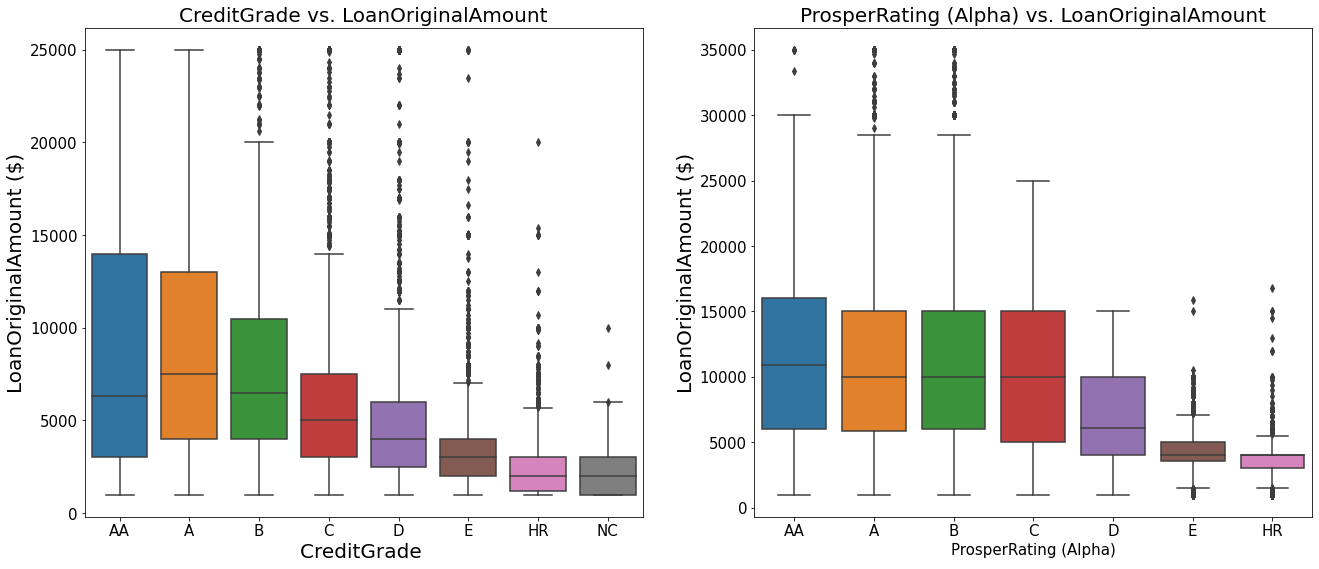

In [46]:
# box plot for CreditGrade vs. LoanOriginalAmount & ProsperRating (Alpha)  
plt.figure(figsize = [20, 8]) 

plt.subplot(1, 2, 1)

sb.boxplot(data = df_copy, x = 'CreditGrade', y = 'LoanOriginalAmount',order=rate_order)
plt.gcf().set_size_inches(10, 8)
plt.title('CreditGrade vs. LoanOriginalAmount',fontsize=20)
plt.xlabel('CreditGrade ',fontsize=20)
plt.ylabel('LoanOriginalAmount ($)',fontsize=20)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
ticks(0)

plt.subplot(1, 2, 2)
sb.boxplot(data = df_copy, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount',order=rate_order2)
plt.gcf().set_size_inches(22,9)
plt.title('ProsperRating (Alpha) vs. LoanOriginalAmount',fontsize=20)
plt.xlabel('ProsperRating (Alpha)',fontsize=15)
plt.ylabel('LoanOriginalAmount ($)',fontsize=20)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
ticks(0)

 conclusion : 
 
the most loans  are less risk  

### 3- loans every year 

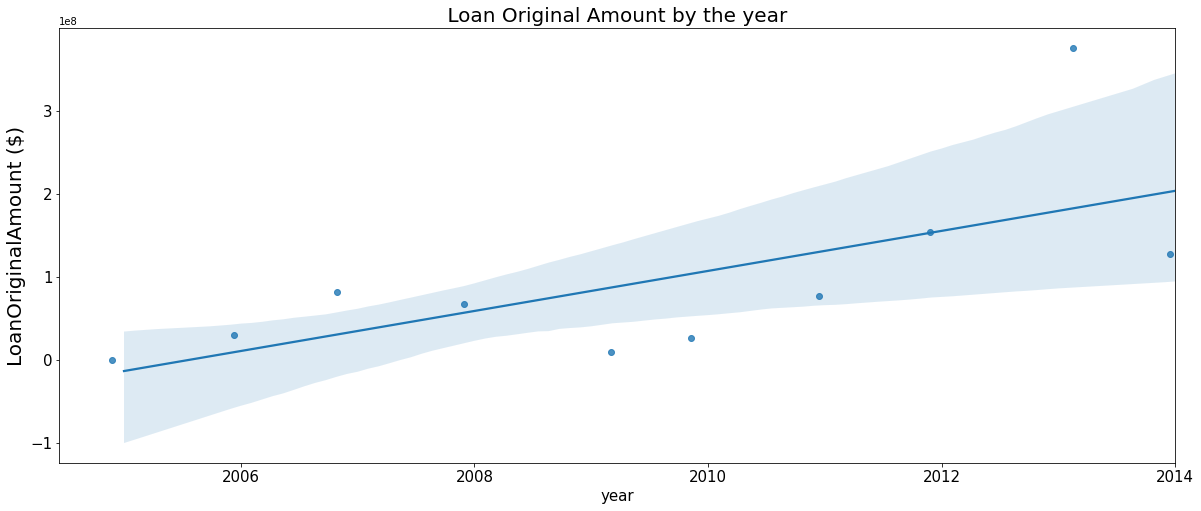

In [47]:
# loan original amount by the year 
plt.figure(figsize = [20, 8]) 

year_loan=df_copy.groupby('year').LoanOriginalAmount.sum()
sb.regplot(data=df_copy,x=year_loan.index,y=year_loan,x_jitter=0.3)
plt.title(' Loan Original Amount by the year ',fontsize=20)
plt.xlabel('year',fontsize=15)
plt.ylabel('LoanOriginalAmount ($)',fontsize=20)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
ticks(0)

conclusion:

2013 was  the year the biggest loans happened   (375740433)

### 4- monthly loan vs year

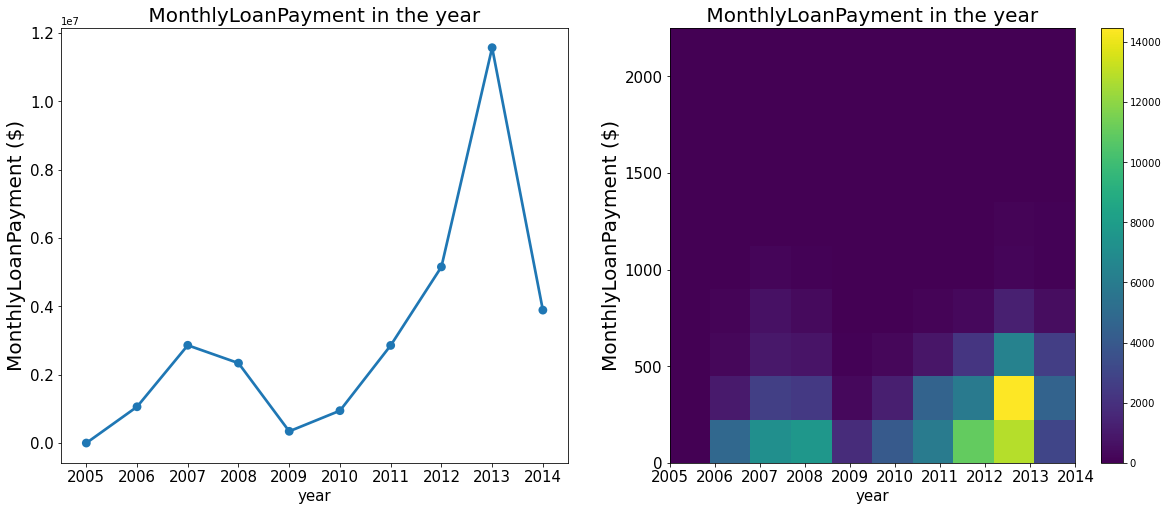

In [48]:
# monthly loan payment in the  year 

plt.figure(figsize = [20, 8]) 
plt.subplot(1,2,1)
year_monthly=df_copy.groupby('year').MonthlyLoanPayment.sum()
sb.pointplot(data=df_copy,x=year_monthly.index,y=year_monthly)
plt.title(' MonthlyLoanPayment in the year ',fontsize=20)
plt.xlabel('year',fontsize=15)
plt.ylabel('MonthlyLoanPayment ($)',fontsize=20)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
ticks(0)

plt.subplot(1,2,2)

plt.hist2d(data=df_copy,x='year',y='MonthlyLoanPayment')
plt.title(' MonthlyLoanPayment in the year ',fontsize=20)
plt.xlabel('year',fontsize=15)
plt.ylabel('MonthlyLoanPayment ($)',fontsize=20)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
ticks(0)
plt.colorbar()

conclusion:

2013 was the year the biggest monthly loan payments  happened (11571616.60)

### 5- prosperating  of each occupation 

Text(-2.6999999999999886, 0.5, ' count')

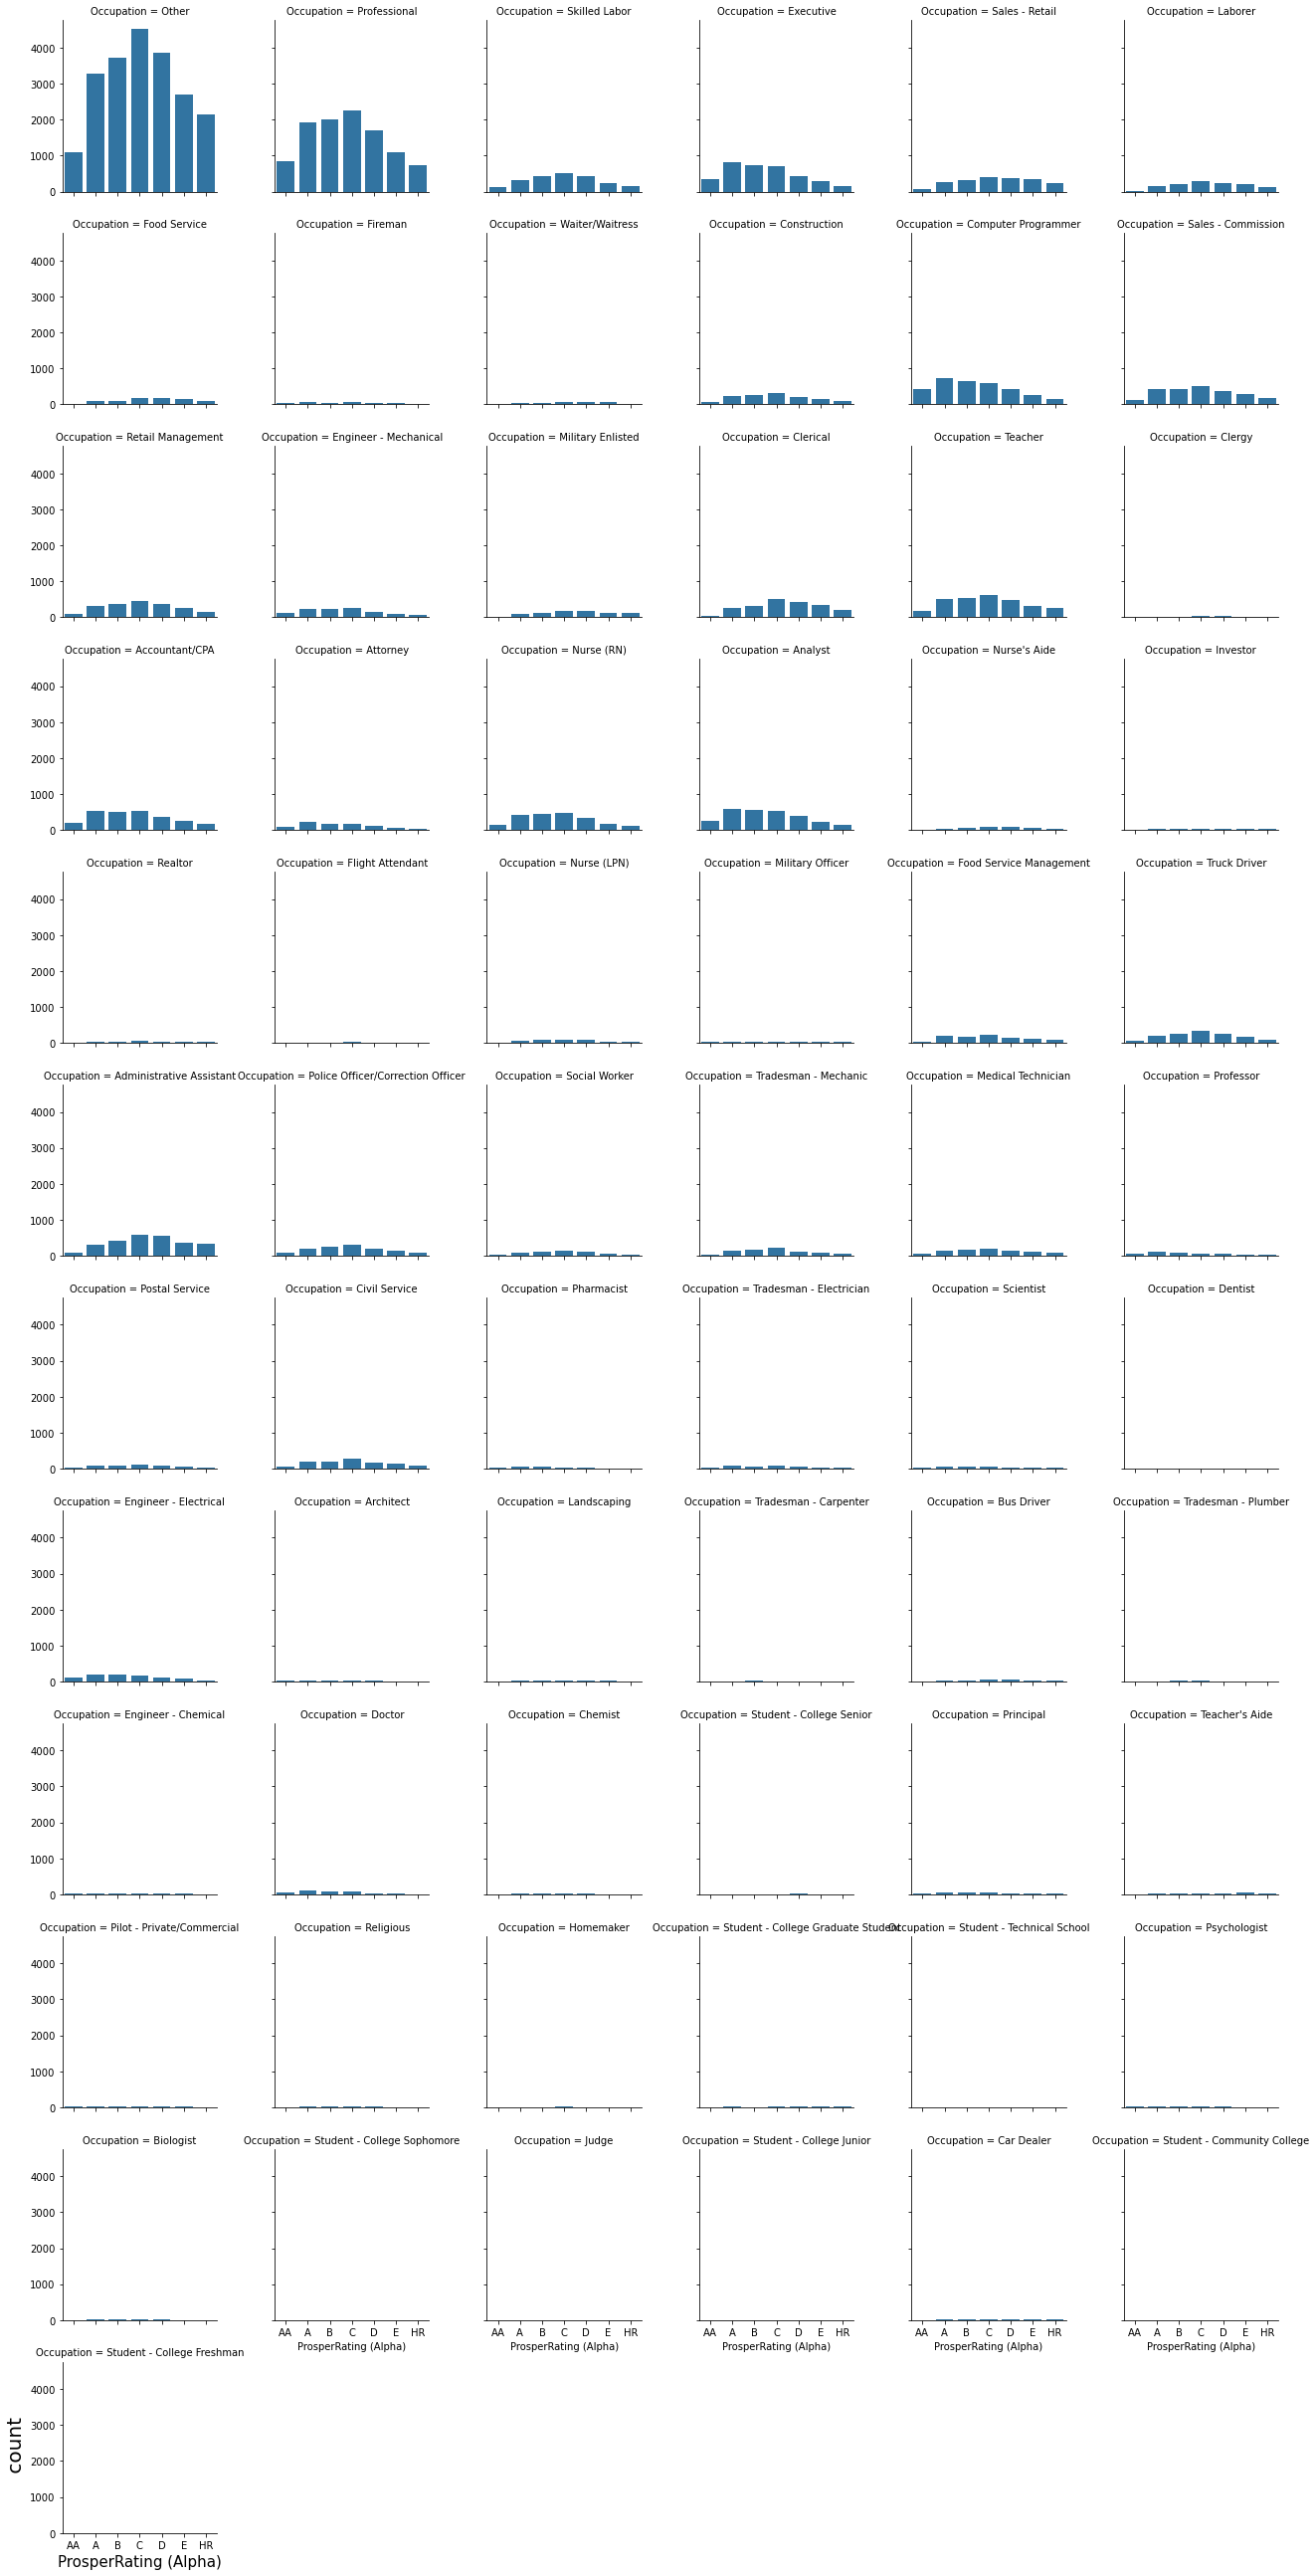

In [49]:
# the risk of each occupation 

g=sb.FacetGrid(data=df_copy ,col='Occupation',col_wrap =6)
g.map(sb.countplot,'ProsperRating (Alpha)',order=rate_order2)
plt.xlabel('ProsperRating (Alpha)',fontsize=15)
plt.ylabel(' count',fontsize=20)

conclusion:

the most common risk ratio with all occupation  is c except (Executive & computer programer (A) )

### 6- income monthly  vs occupation 

Text(0.5, 0, 'occupation   ')

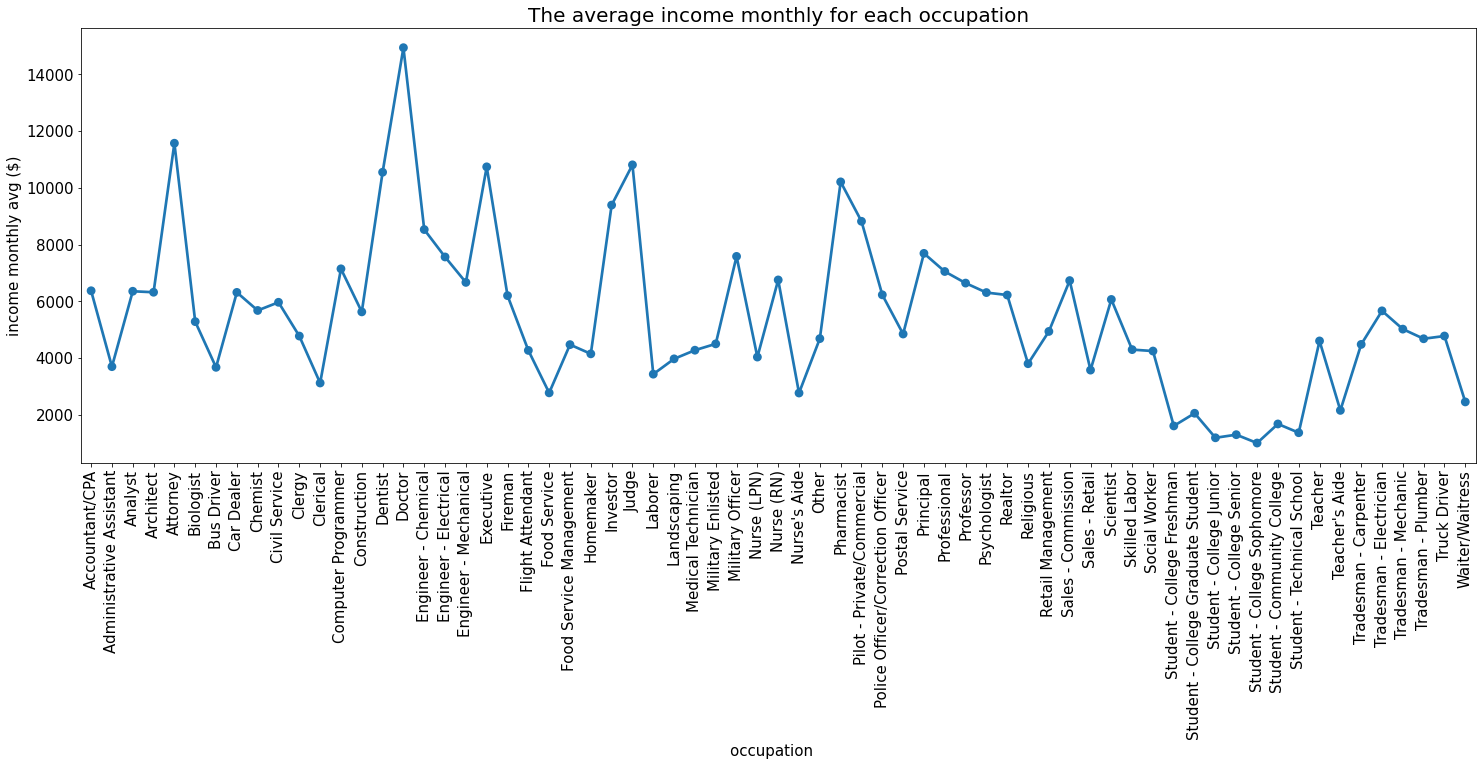

In [50]:
#average income  monthly  
plt.figure(figsize = [25, 8]) 


sb.pointplot(data=df_copy,x=df_copy.groupby('Occupation').StatedMonthlyIncome.mean().index
             ,y=df_copy.groupby('Occupation').StatedMonthlyIncome.mean())
#plt.xticks(rotation=90,fontsize=20)
#plt.yticks(rotation=0,fontsize=20)
ticks(90)

plt.ylabel('income monthly avg ($)',fontsize=15)
plt.title('The average income monthly for each occupation',fontsize=20)
plt.xlabel('occupation   ',fontsize=15)



conclusion: 

doctor occupation  that is the most average income monthly  ,
and students are the least income 


### 7- occupation and the risk 

Text(0.5, 0, 'ProsperRating (Alpha)   ')

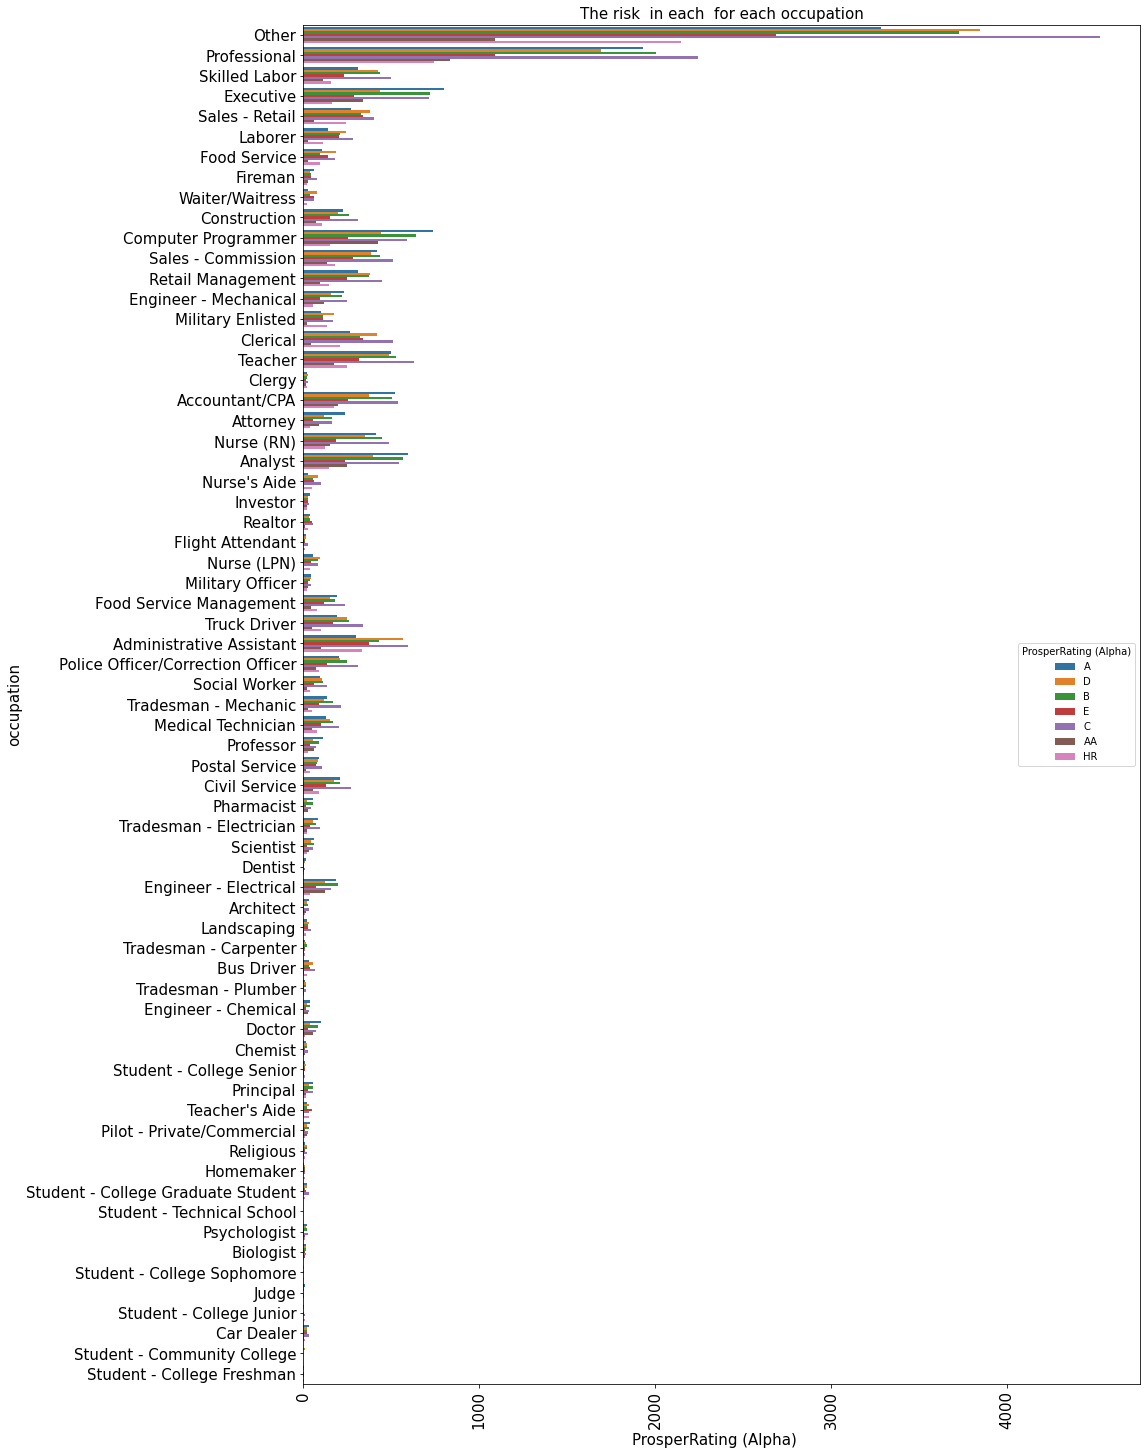

In [51]:
# the prosper rating with each occupation 

plt.figure(figsize = [15, 25]) 

sb.countplot(data=df_copy,y='Occupation', hue='ProsperRating (Alpha)')
#plt.xticks(rotation=90,fontsize=20)
#plt.yticks(rotation=0,fontsize=15)
ticks(90)

plt.ylabel('occupation',fontsize=15)
plt.title('The risk  in each  for each occupation',fontsize=15)
plt.xlabel('ProsperRating (Alpha)   ',fontsize=15)             

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


1- The higher the **monthly income** , the higher the **loan amount**

2- doctor occupation that is the most average income monthly , and students are the least income

3- the most common risk ratio with all occupation  is c

4- monthly income to doctors is very good so I found  the counts   of loans for they are too less  & the risk ratio of loan is  good  (from AA to C)



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> yes i found   relationship between years and  average of income monthly  

## Multivariate Exploration



### 1- loan original vs browwer apr  & rate  & inverstors  & totaltrades 

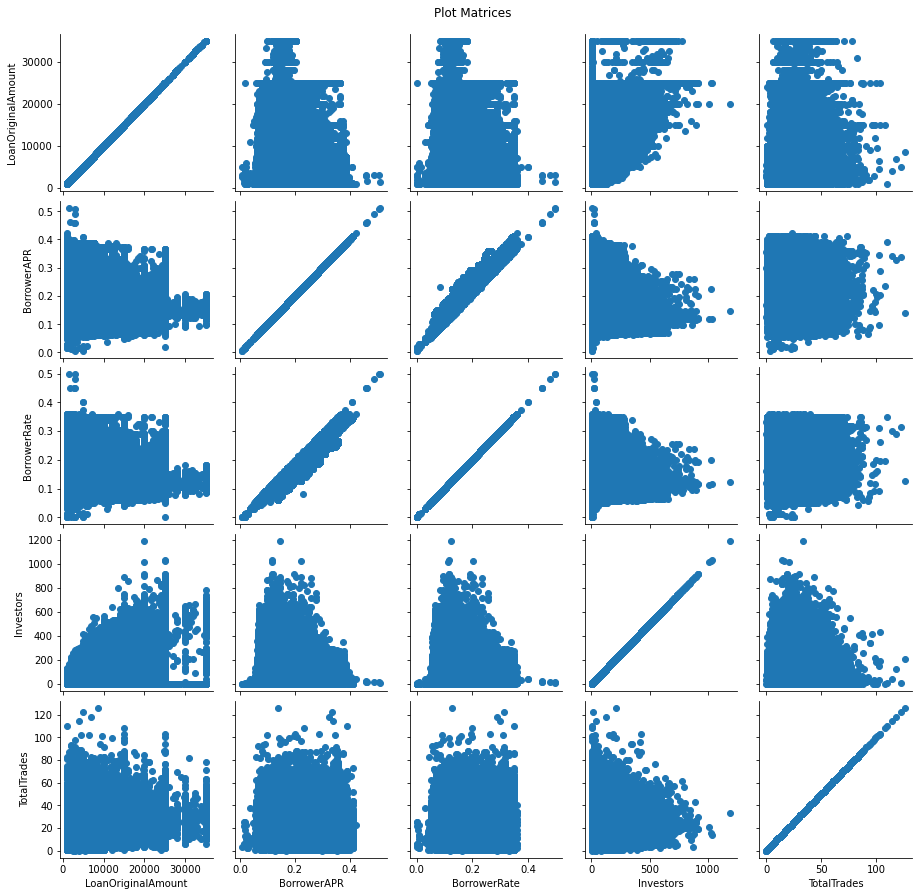

In [52]:
# scatter loan original vs browwer apr  & rate  & inverstors  & totaltrades 
var=['LoanOriginalAmount','BorrowerAPR','BorrowerRate','Investors','TotalTrades']
g=sb.PairGrid(data=df_copy,vars=var)
g.map(plt.scatter)
g.fig.suptitle('Plot Matrices')
g.fig.subplots_adjust(top=0.95);

conclusion: 
 

1- relationship between loan amount & trades  (the common less than 10,000 dollar and less than 100 trades )

2- relationship between loan amount & investors (the common between 10,000 - 25,000 dollar and between 0 - 600 investors)



###  2- CurrentlyInGroup vs investors &total trades  

Text(0.5, 1.0, 'CurrentlyInGroup and Total trades   in each year')

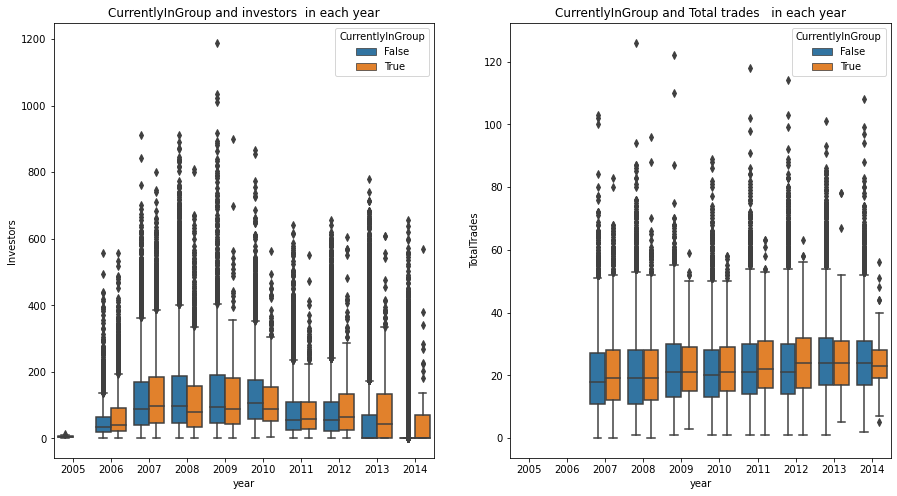

In [53]:
## box plot between CurrentlyInGroup and investors  in each year 
plt.figure(figsize = [15, 8]) 

plt.subplot(1,2,1)
sb.boxplot(data=df_copy, x='year', y='Investors', hue='CurrentlyInGroup');
plt.title('CurrentlyInGroup and investors  in each year')
## box plot between CurrentlyInGroup and total trades  in each year 

plt.subplot(1,2,2)
sb.boxplot(data=df_copy, x='year', y='TotalTrades', hue='CurrentlyInGroup');
plt.title('CurrentlyInGroup and Total trades   in each year')

conclusion: 
 
1- investors in last years in Currently In Group .

2- total trades were bigger at last years   not in the group .

### 3- LoanOriginalAmount  in earch state 

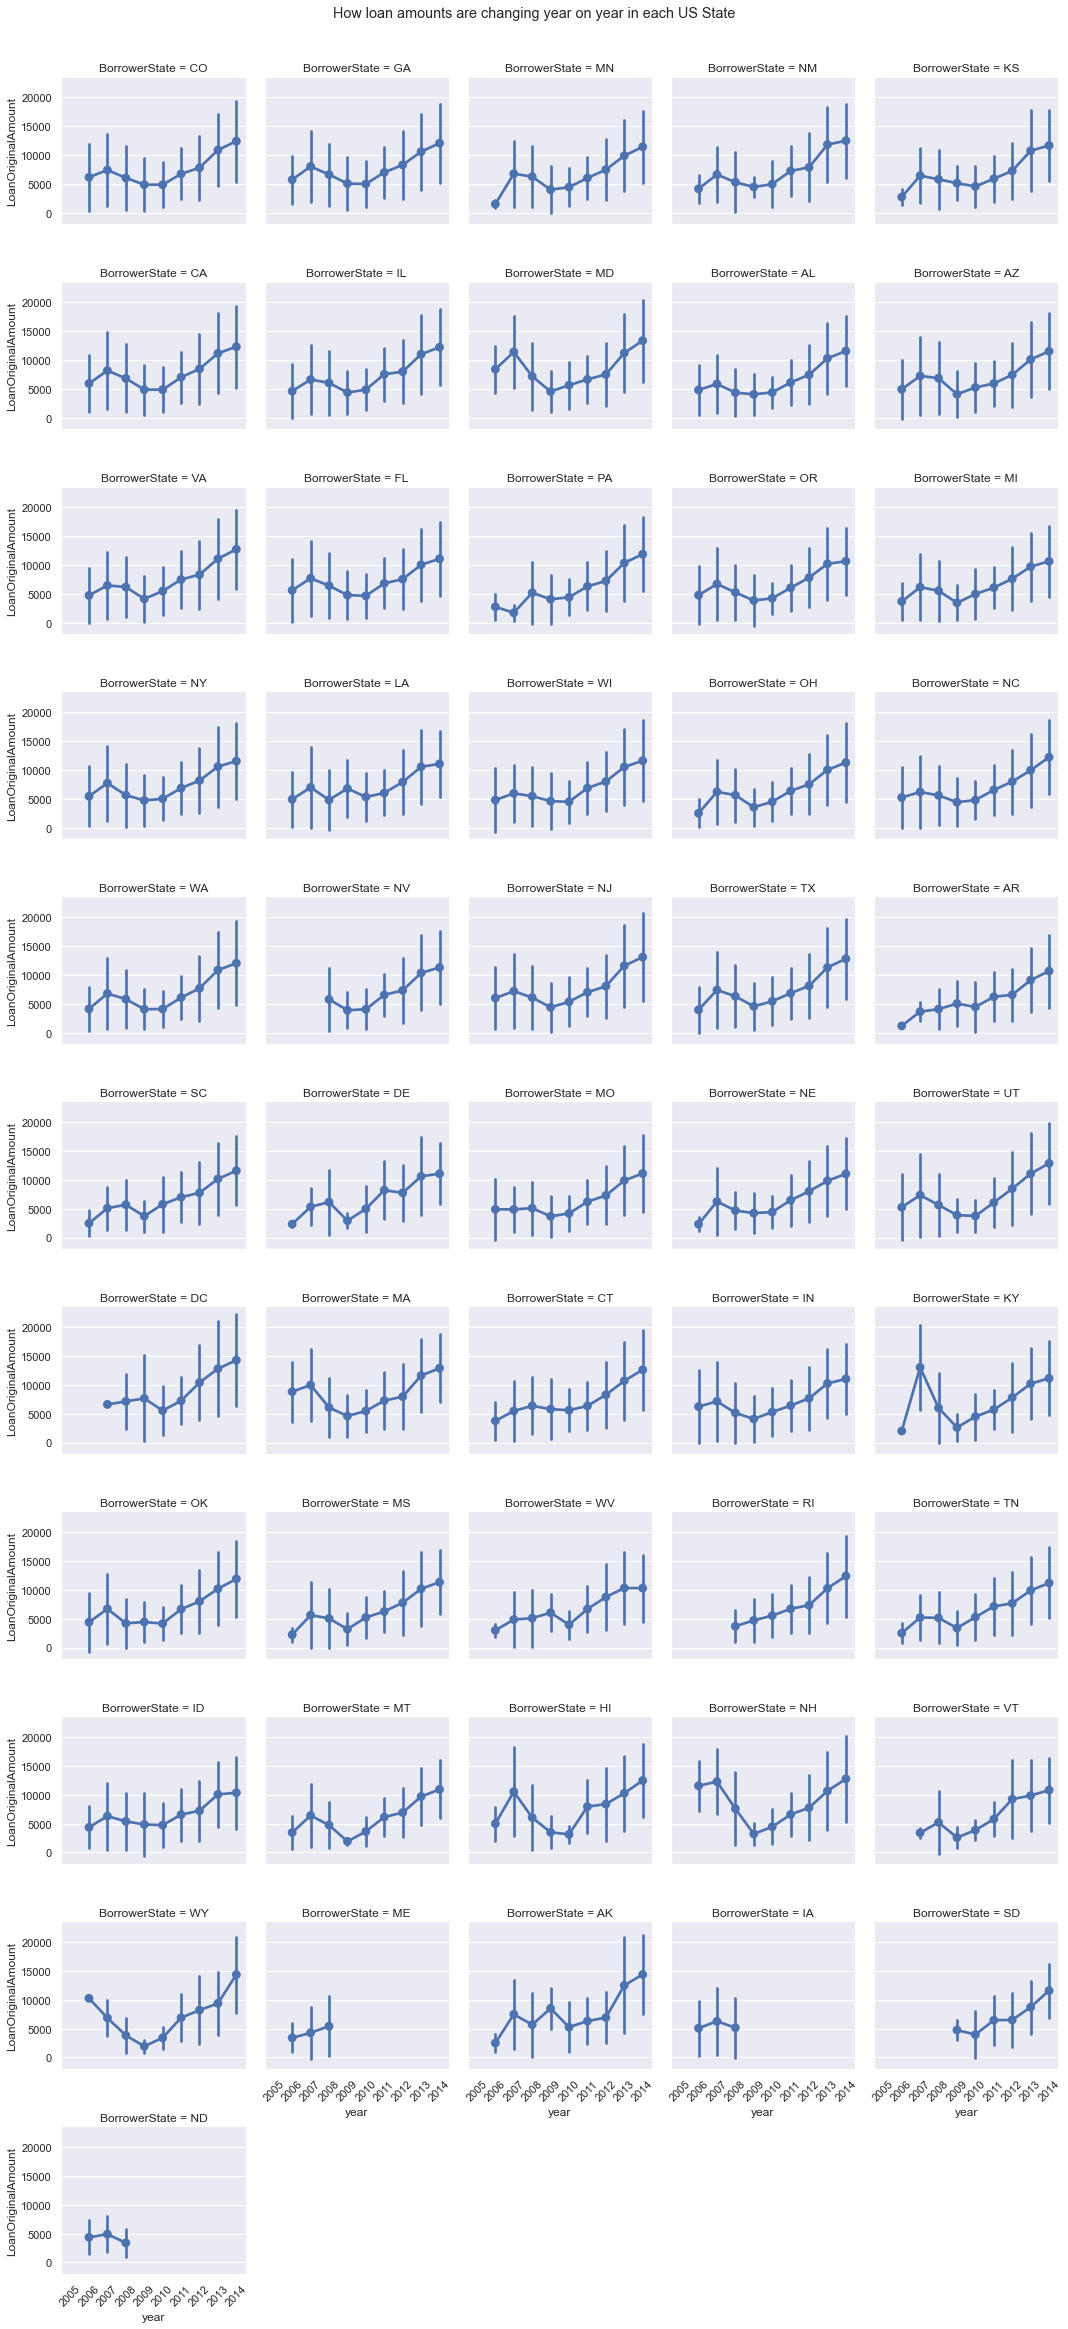

In [54]:
sb.set()
year_order = np.sort(df_copy.year.unique())

g=sb.FacetGrid(data=df_copy, col='BorrowerState', col_wrap=5)
g.map(sb.pointplot, 'year','LoanOriginalAmount', ci='sd', order=year_order)
g.set_xticklabels(rotation=45)
g.fig.suptitle('How loan amounts are changing year on year in each US State')
plt.tight_layout()
g.fig.subplots_adjust(top=0.95);

### 4- LoanOriginalAmount in earch reason 

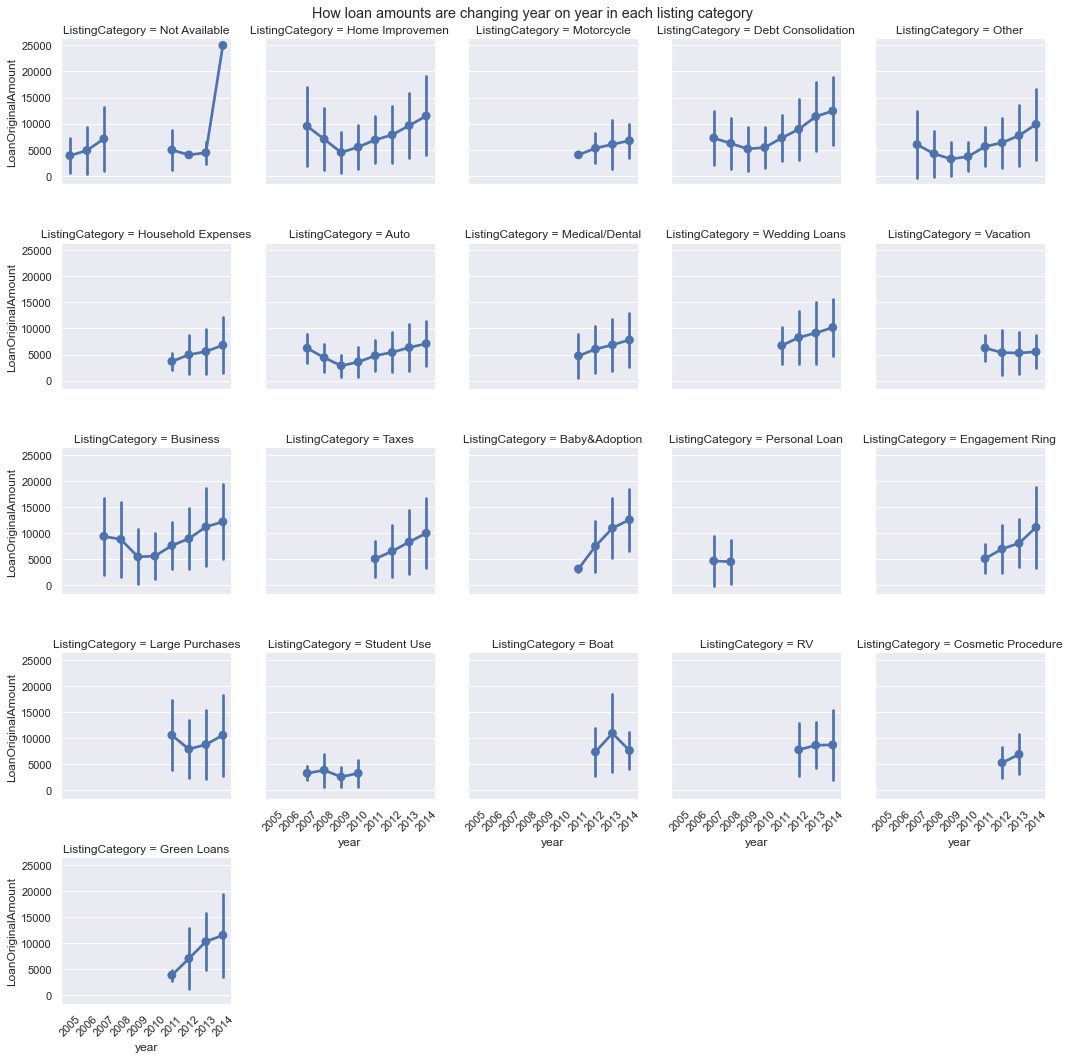

In [55]:
sb.set()
year_order = np.sort(df_copy.year.unique())

g=sb.FacetGrid(data=df_copy, col='ListingCategory', col_wrap=5)
g.map(sb.pointplot, 'year','LoanOriginalAmount', ci='sd', order=year_order)
g.set_xticklabels(rotation=45)
g.fig.suptitle('How loan amounts are changing year on year in each listing category ')
plt.tight_layout()
g.fig.subplots_adjust(top=0.95);

conclusion: 

 we can see the some of reasons loan is beginning at last 4 years (2011-1014) like  (Motorcycle ,Vacation ,Household Expenses,     Medical/Dental,Engagement Ring ,Taxes, Baby&Adoption, Green Loans ,Large Purchases )
 
  and we can see the some of reasons loan is beginning at last 3 years (2012-2014) like (Boat, RV)

### 5-  how many  investors  & total trades in each term every year   

Text(0.5, 1.0, 'how many  total trades  in each term every year')

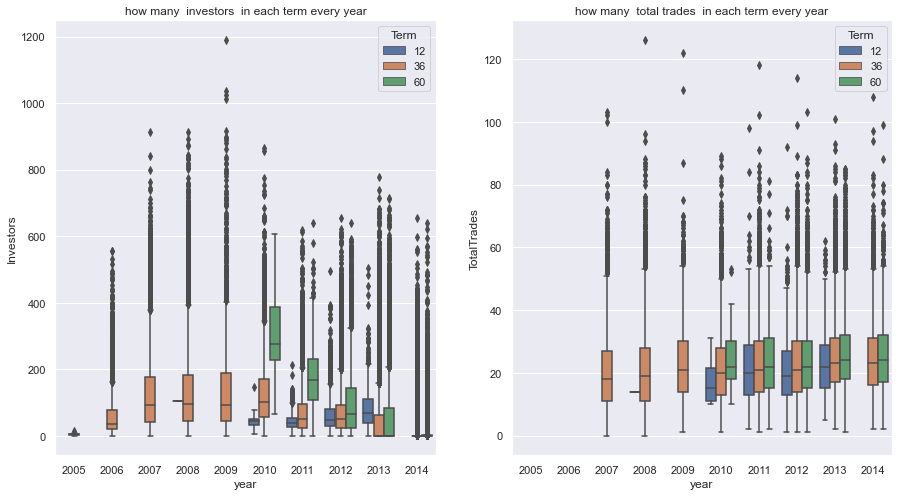

In [56]:
plt.figure(figsize = [15, 8]) 
##  investors in each term every year   
plt.subplot(1,2,1)
sb.boxplot(data=df_copy, x='year', y='Investors', hue='Term');
plt.title('how many  investors  in each term every year')

##  total trades in each term every year   
plt.subplot(1,2,2)
sb.boxplot(data=df_copy, x='year', y='TotalTrades', hue='Term');
plt.title('how many  total trades  in each term every year')


### 6- relationship between investors &total trades in every year 

Text(0.5, 0.98, 'relationship between investors &total trades by  year ')

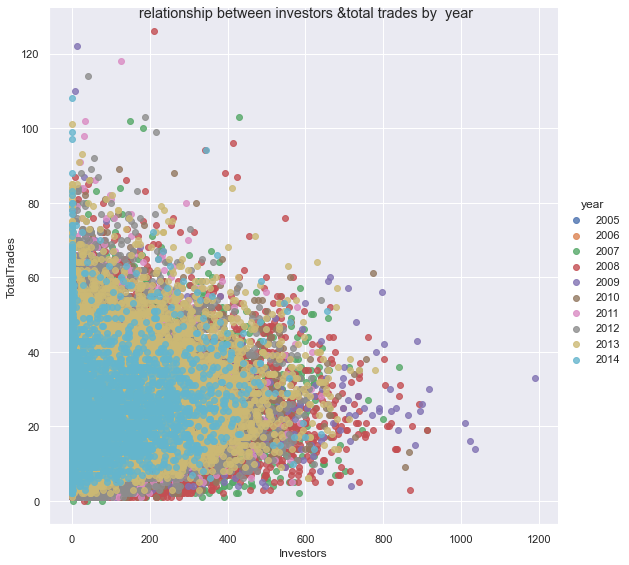

In [57]:

g=sb.FacetGrid(data=df_copy,hue='year',height=8)
g.map(sb.regplot,'Investors','TotalTrades',x_jitter=0.3,fit_reg=False)
g.add_legend()
g.fig.suptitle('relationship between investors &total trades by  year ')


conclusion: 

the investors and total trades diffuse between 0-600 investors & 0 -80 total trades in last years 

### 7- LoanOriginalAmount vs risk ratio in each term 

Text(0.5, 1.0, 'LoanOriginalAmount vs risk ratio in each term ')

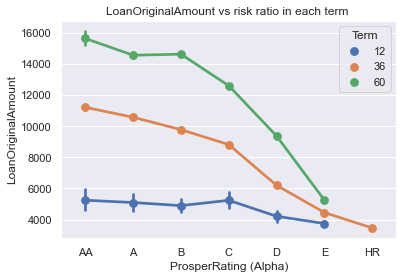

In [52]:
#LoanOriginalAmount vs risk ratio in each term  
sb.pointplot(data = df_copy, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',order=rate_order2)
plt.title('LoanOriginalAmount vs risk ratio in each term ')

conclusion:

1- term 60 months had the biggest loan amount and not have hr risk

2- 36 months had an average loan amount and have hr risk

3- 12 months had a less loan amount and not have hr risk

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

1- relationship between loan amount & trades  (the common less than 10,000 dollar and less than 100 trades )

2- relationship between loan amount & investors (the common between 10,000 - 25,000 dollar and between 0 - 600 investors)


### Were there any interesting or surprising interactions between features?

yes the intersting thing in the relationship between the risk and term and the loan amout 
i found the biggest loan amount in each term  had the risk AA 
